# ISS Projekt 2023/24

Honza Pavlus, Honza Brukner a Honza Černocký, ÚPGM FIT VUT

6.11. 2023



## 1. Úvod

V projektu budete pracovat se biomedicínskými signály a to konkrétně se signálem elektrokardiogramu EKG. Vyzkoušíte si filtraci tohoto druhu signálu, abyste dostali krásné EKG křivky, které můžete vidět ve filmech. Dále si zkusíte vybudovat jednoduchý, ale účinný detektor QRS a ti, kteří se vrhnou i na bonusový úkol, si zkusí odhalit srdeční patologii. K dispozici dostanete každý 3 nahrávky jednokanálového EKG signálu, jeden zdravý a dva s různými patologiemi.

Projekt je nejlépe možno řešit v Python-u a to přímo v dodaném Python notebooku, který si můžete zkopírovat do vlastního Google Colabu. Projekt je také možno řešit v Matlab-u, Octave, Julii, jazyce C, Java nebo v libovolném jiném programovacím či skriptovacím jazyce. Je možné použít libovolné knihovny. Projekt se nezaměřuje na “krásu programování”, není tedy nutné mít vše úhledně zabalené do okomentovaných funkcí (samozřejmě se ale okomentovaný kód lépe opravuje a to hlavně v případě podivných výsledků), ošetřené všechny chybové stavy, atd. Důležitý je výsledek.

**Vaši práci odevzdáváte vyexportovanou do dvou souborů: (1) do PDF souboru login.pdf, (2) do Python notebooku login.ipynb. PDF musí obsahovat výsledky prokazatelně vytvořené Vaším kódem.** V případě řešení projektu v jiném jazyce nebo prostředí než v dodaném Python notebooku, je prvním souborem protokol v PDF, druhý soubor je archiv s Vaším kódem. Ten musí být spustitelný na standardní fakultní distribuci Windows nebo Linuxu.

## 3. Vstup
Pro řešení projektu má každý student/ka k disposici osobní soubor se  zdravým signálem (sinusovým rytmem): ***login.wav***, kde login je váš xlogin popřípadě VUT číslo (pro studenty FSI). Dále jsou k disposici  ještě další dva signály: ***FIS.wav*** a ***KES.wav***. První signál obsahuje fibrilaci a druhý komorovou extrasystolu. Tyhle dva soubory jsou pro všechny společné a využijete je při řešení bonusového úkolu.

In [1]:
#Načtení Vašeho signálu - xlogin99 nahraďte Vaším loginem
import soundfile as sf

!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xhubin04.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/FIB.wav
!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/KES.wav

x, fs = sf.read("xhubin04.wav")

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/leviathan/.wget-hsts'. HSTS will be disabled.
--2023-12-17 22:04:02--  https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xhubin04.wav
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10044 (9,8K) [audio/x-wav]
Saving to: ‘xhubin04.wav.8’

xhubin04.wav.8      100%[===================>]   9,81K  --.-KB/s    in 0,002s  

2023-12-17 22:04:03 (4,67 MB/s) - ‘xhubin04.wav.8’ saved [10044/10044]

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/leviathan/.wget-hsts'. HSTS will be disabled.
--2023-12-17 22:04:03--  https://www.fit.vutbr.cz/stud

## 4. Úkoly



### 4.1. [2.5b] Nahrání a zobrazení EKG signálu

Nezapomeňte na popisy os u jednotlivých grafů.

 a) [1b] Nahrajte EKG signál login.wav, vyberte 5-sekundový úsek a zobrazte ho v časové doméně. Pro nahrání signálu použijte knihovny numpy a soundfile.

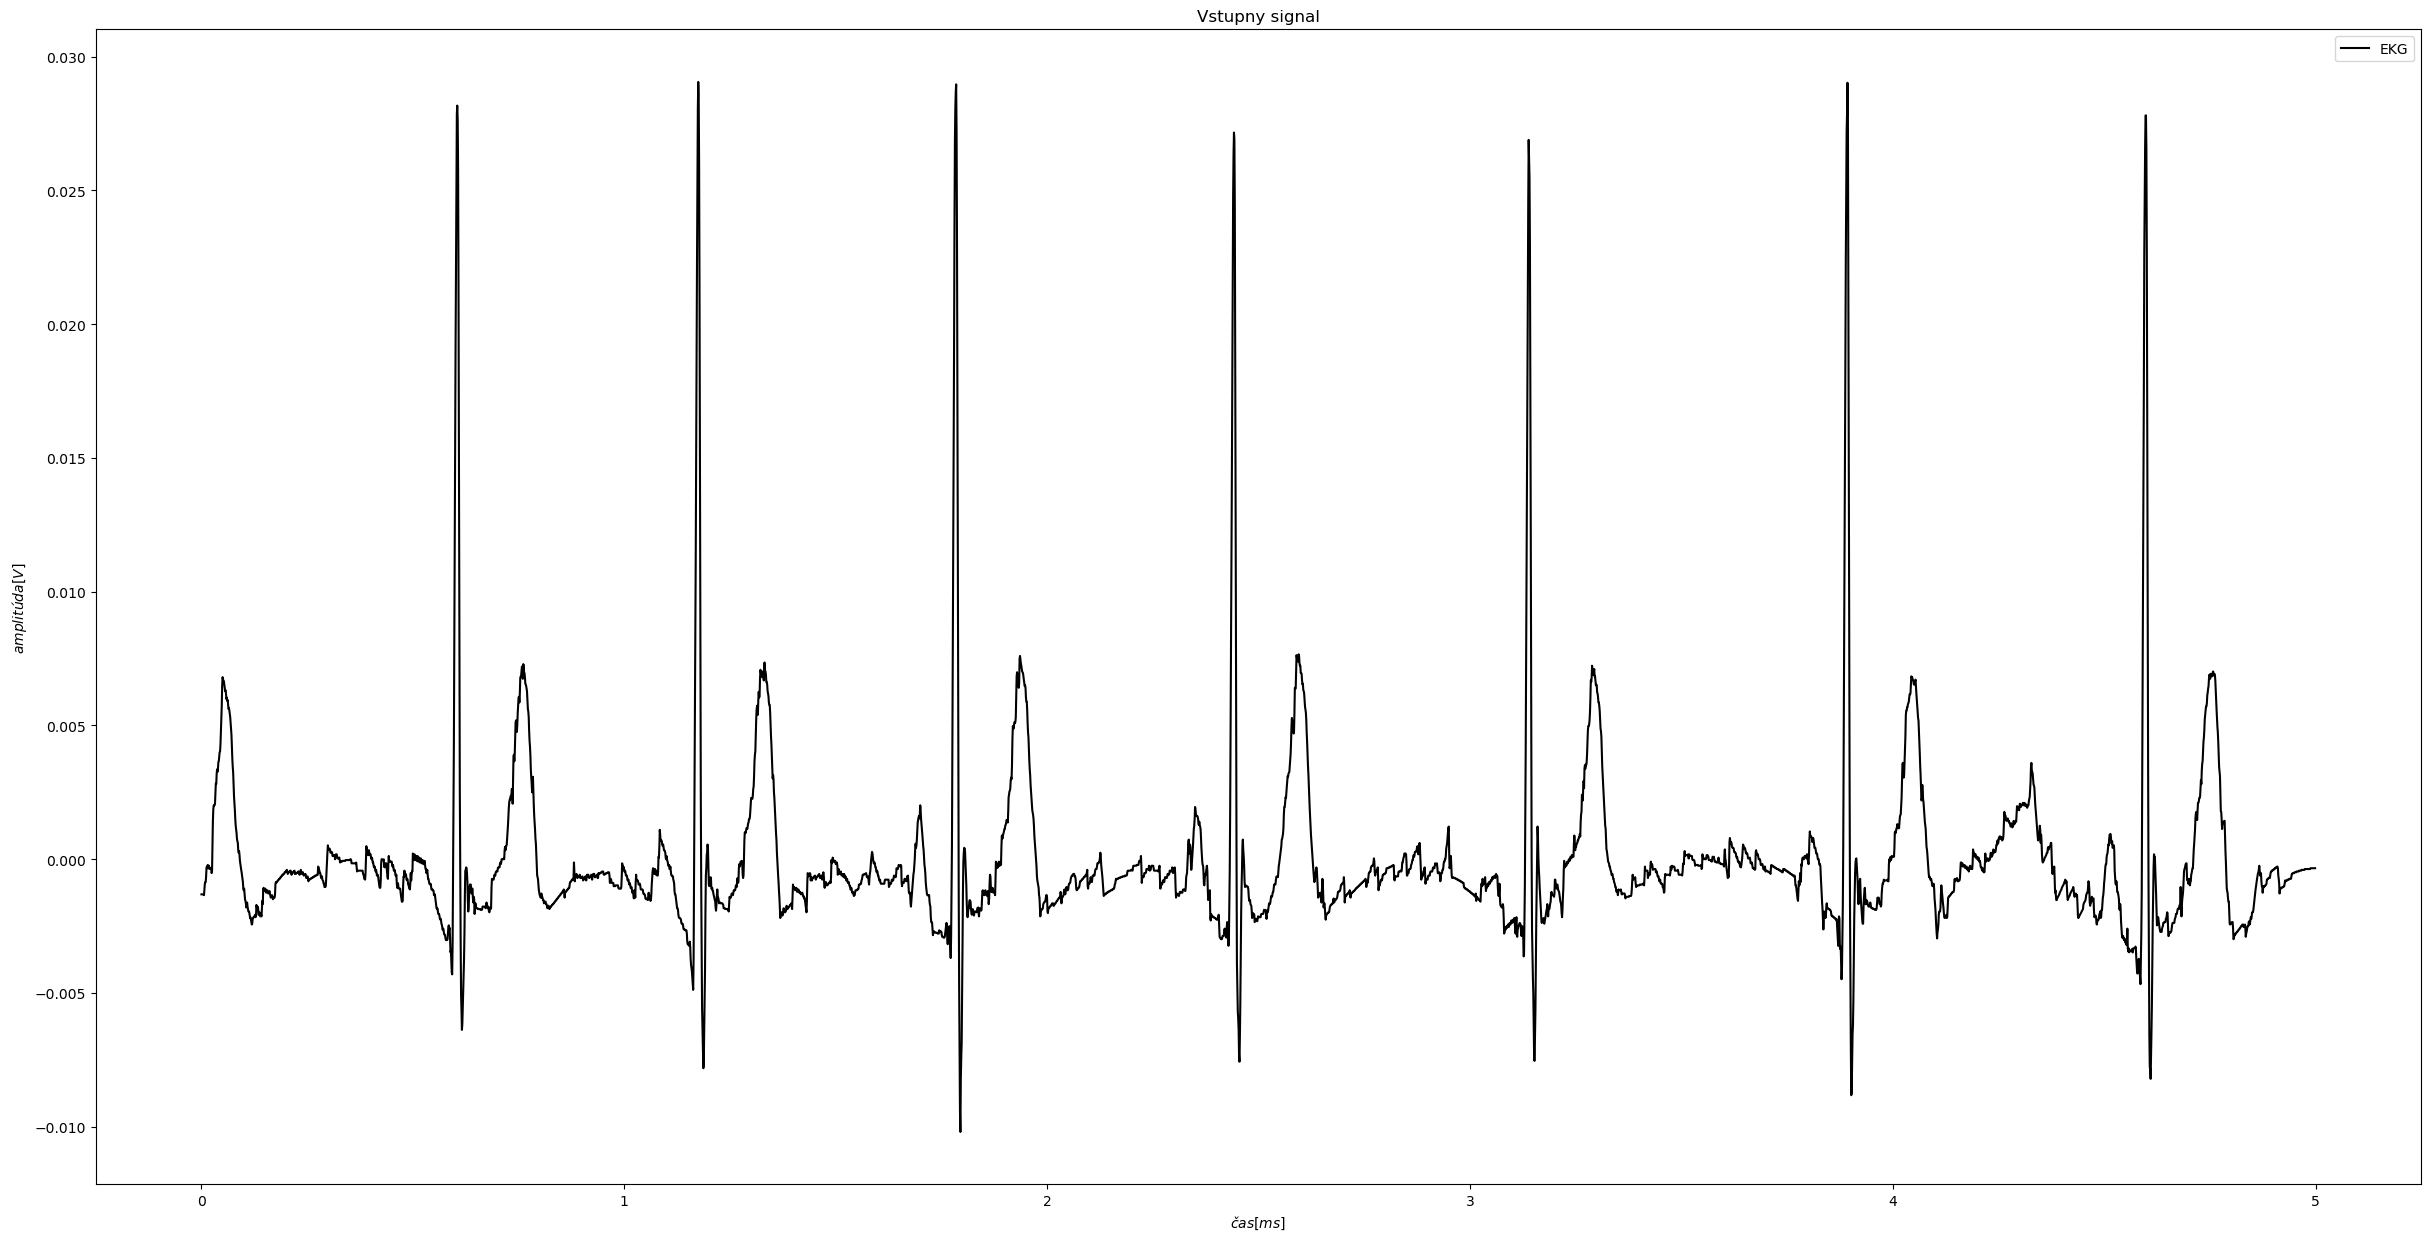

In [2]:
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np


x, fs = sf.read("xhubin04.wav")
time = np.arange(0, len(x)) / fs * 0.5

plt.title('Vstupny signal')
plt.gca().set_xlabel('$čas[ms]$')
plt.gca().set_ylabel('$amplitúda [V]$')
plt.plot(time, x, color='black', label='EKG')
plt.legend()
plt.show()
# plt.savefig("png/1a.png")

b) [1b] Spočítejte spektrum z 5 sekundového úseku nahraného signálu a zobrazte jej.

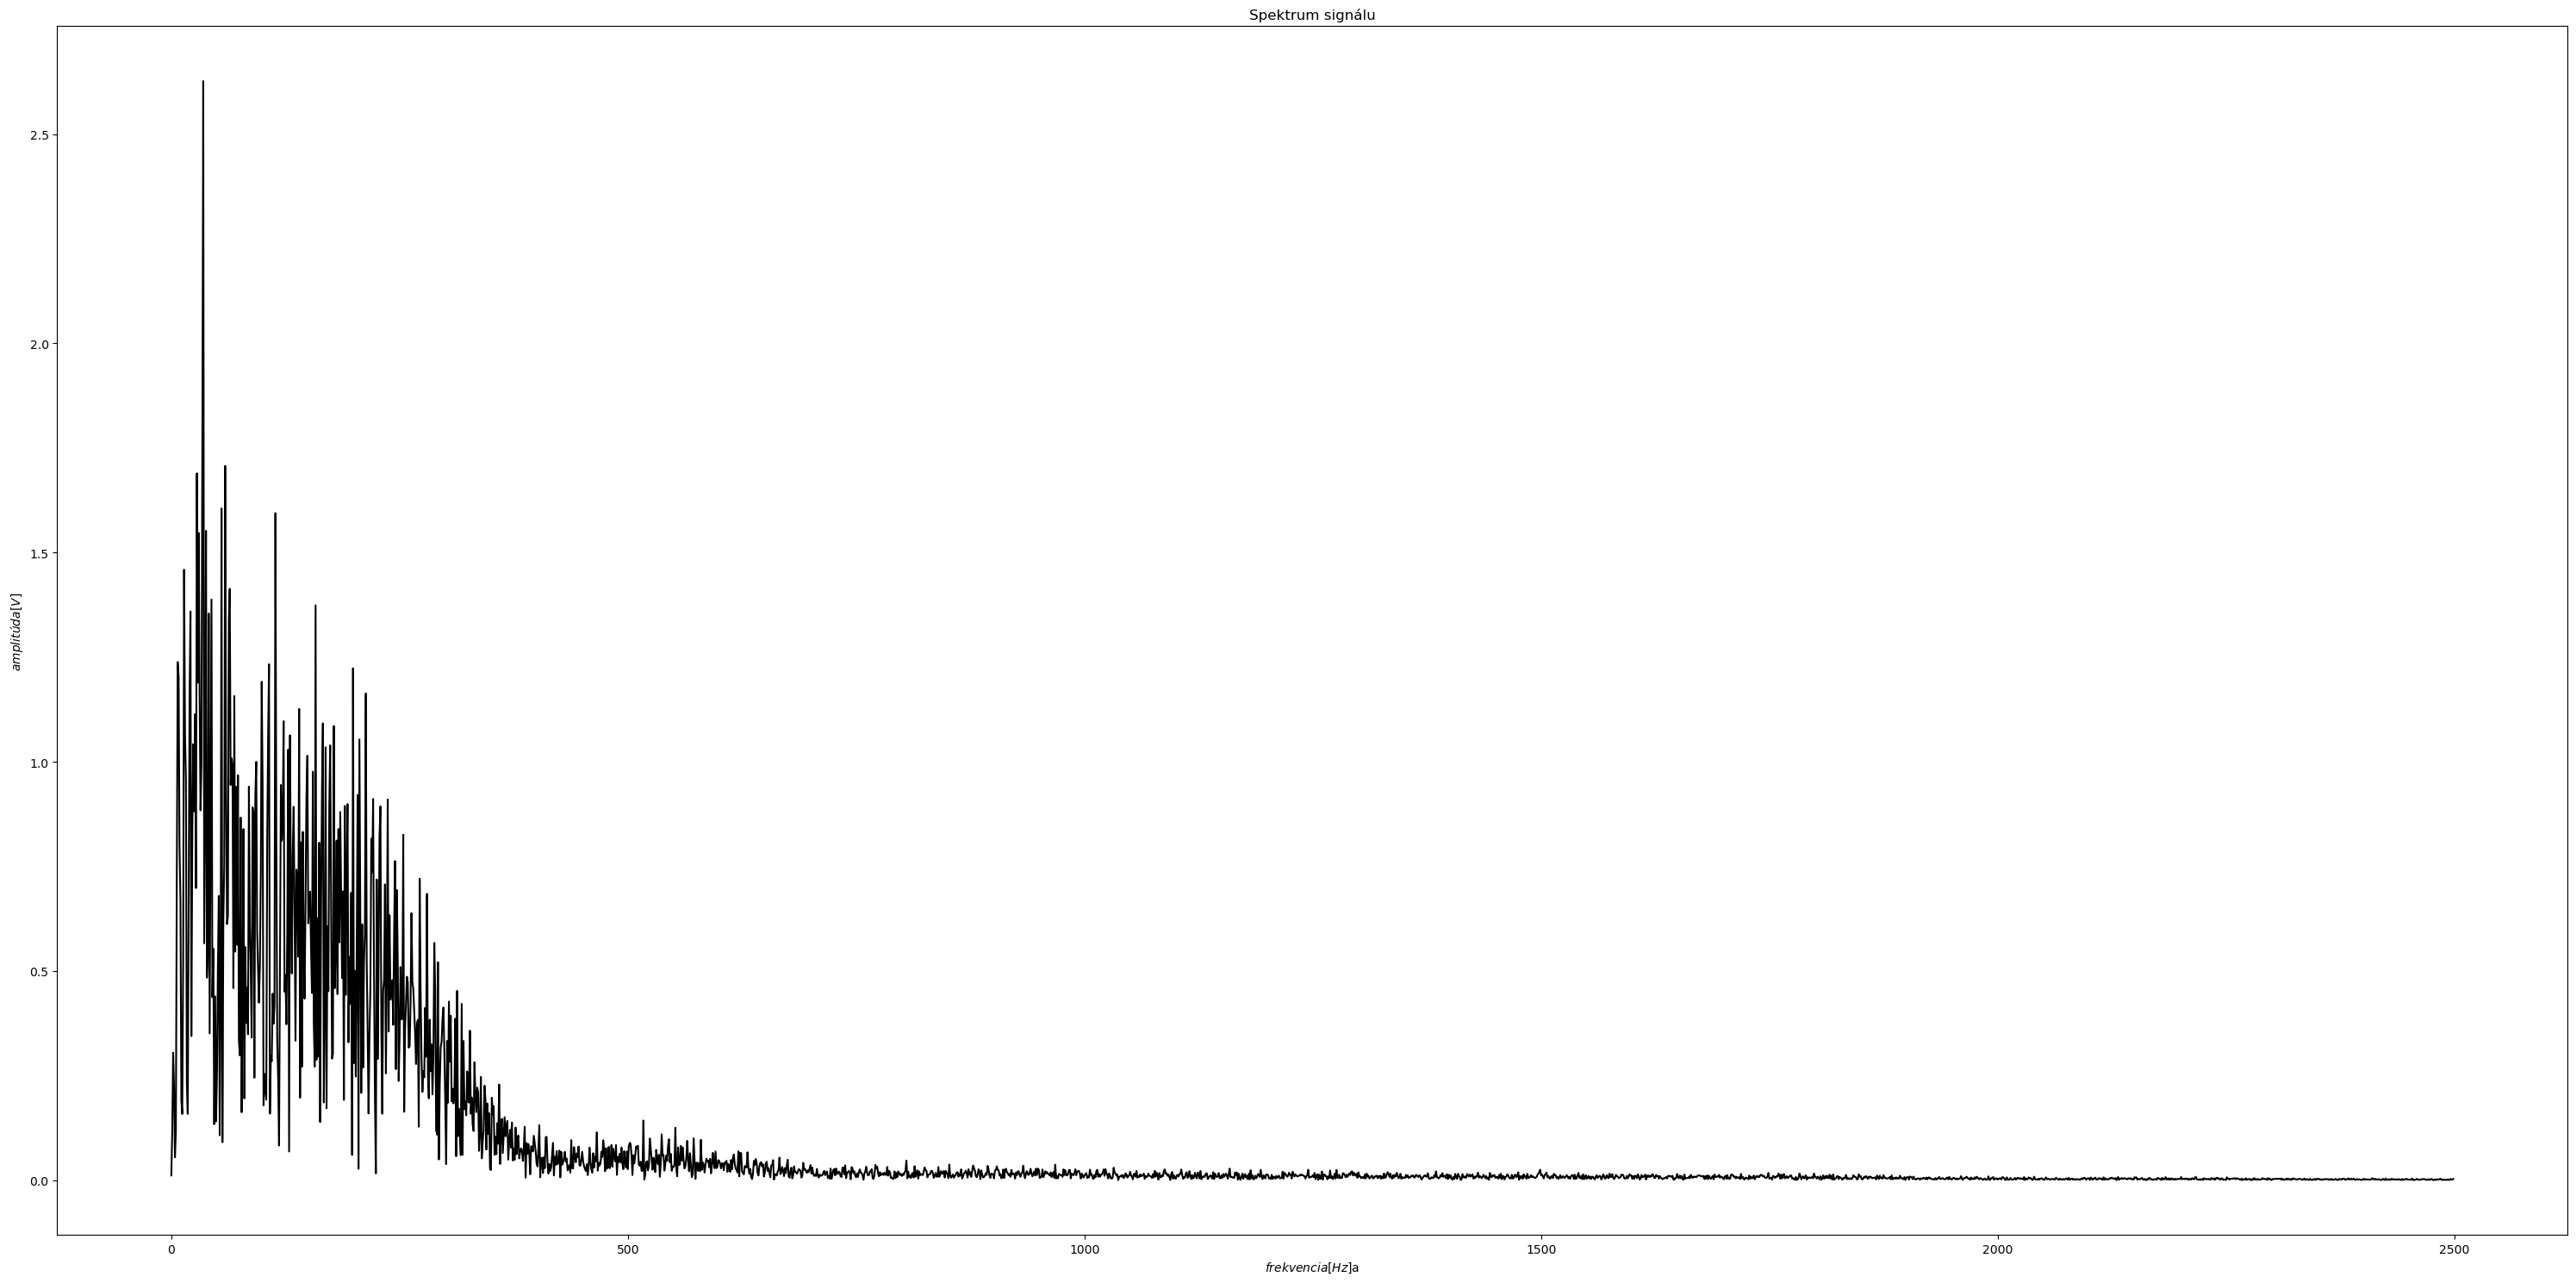

In [3]:
import math

x, fs = sf.read("xhubin04.wav")

spectre = np.fft.fft(x)
new = abs(spectre)
half = new[:new.size // 2]

plt.title('Spektrum signálu')
plt.gca().set_ylabel('$amplitúda [V]$')
plt.gca().set_xlabel('$frekvencia[Hz]$')
plt.plot(half, color='black')

plt.tight_layout()
plt.show()

# plt.savefig("png/1b.png")

 c) [0.5b] Ve spektru vidíte rušení na 50Hz nebo 60Hz a jejich harmonických frekvencích. Vysvětlete, čím je způsobeno.

Rušenie elektrickej siete. 230 voltov 50Hz

### 4.2. [3b] Převzorkujte nahraný signál



a) [2b] Převzorkujte signál na vzorkovací frekvenci 100 Hz, nezapomeňte na filtr pro antialiasing. Můžete například odstranit část spektra od $\frac{Fs}{2}$ nebo použít filtr dolní propusti.

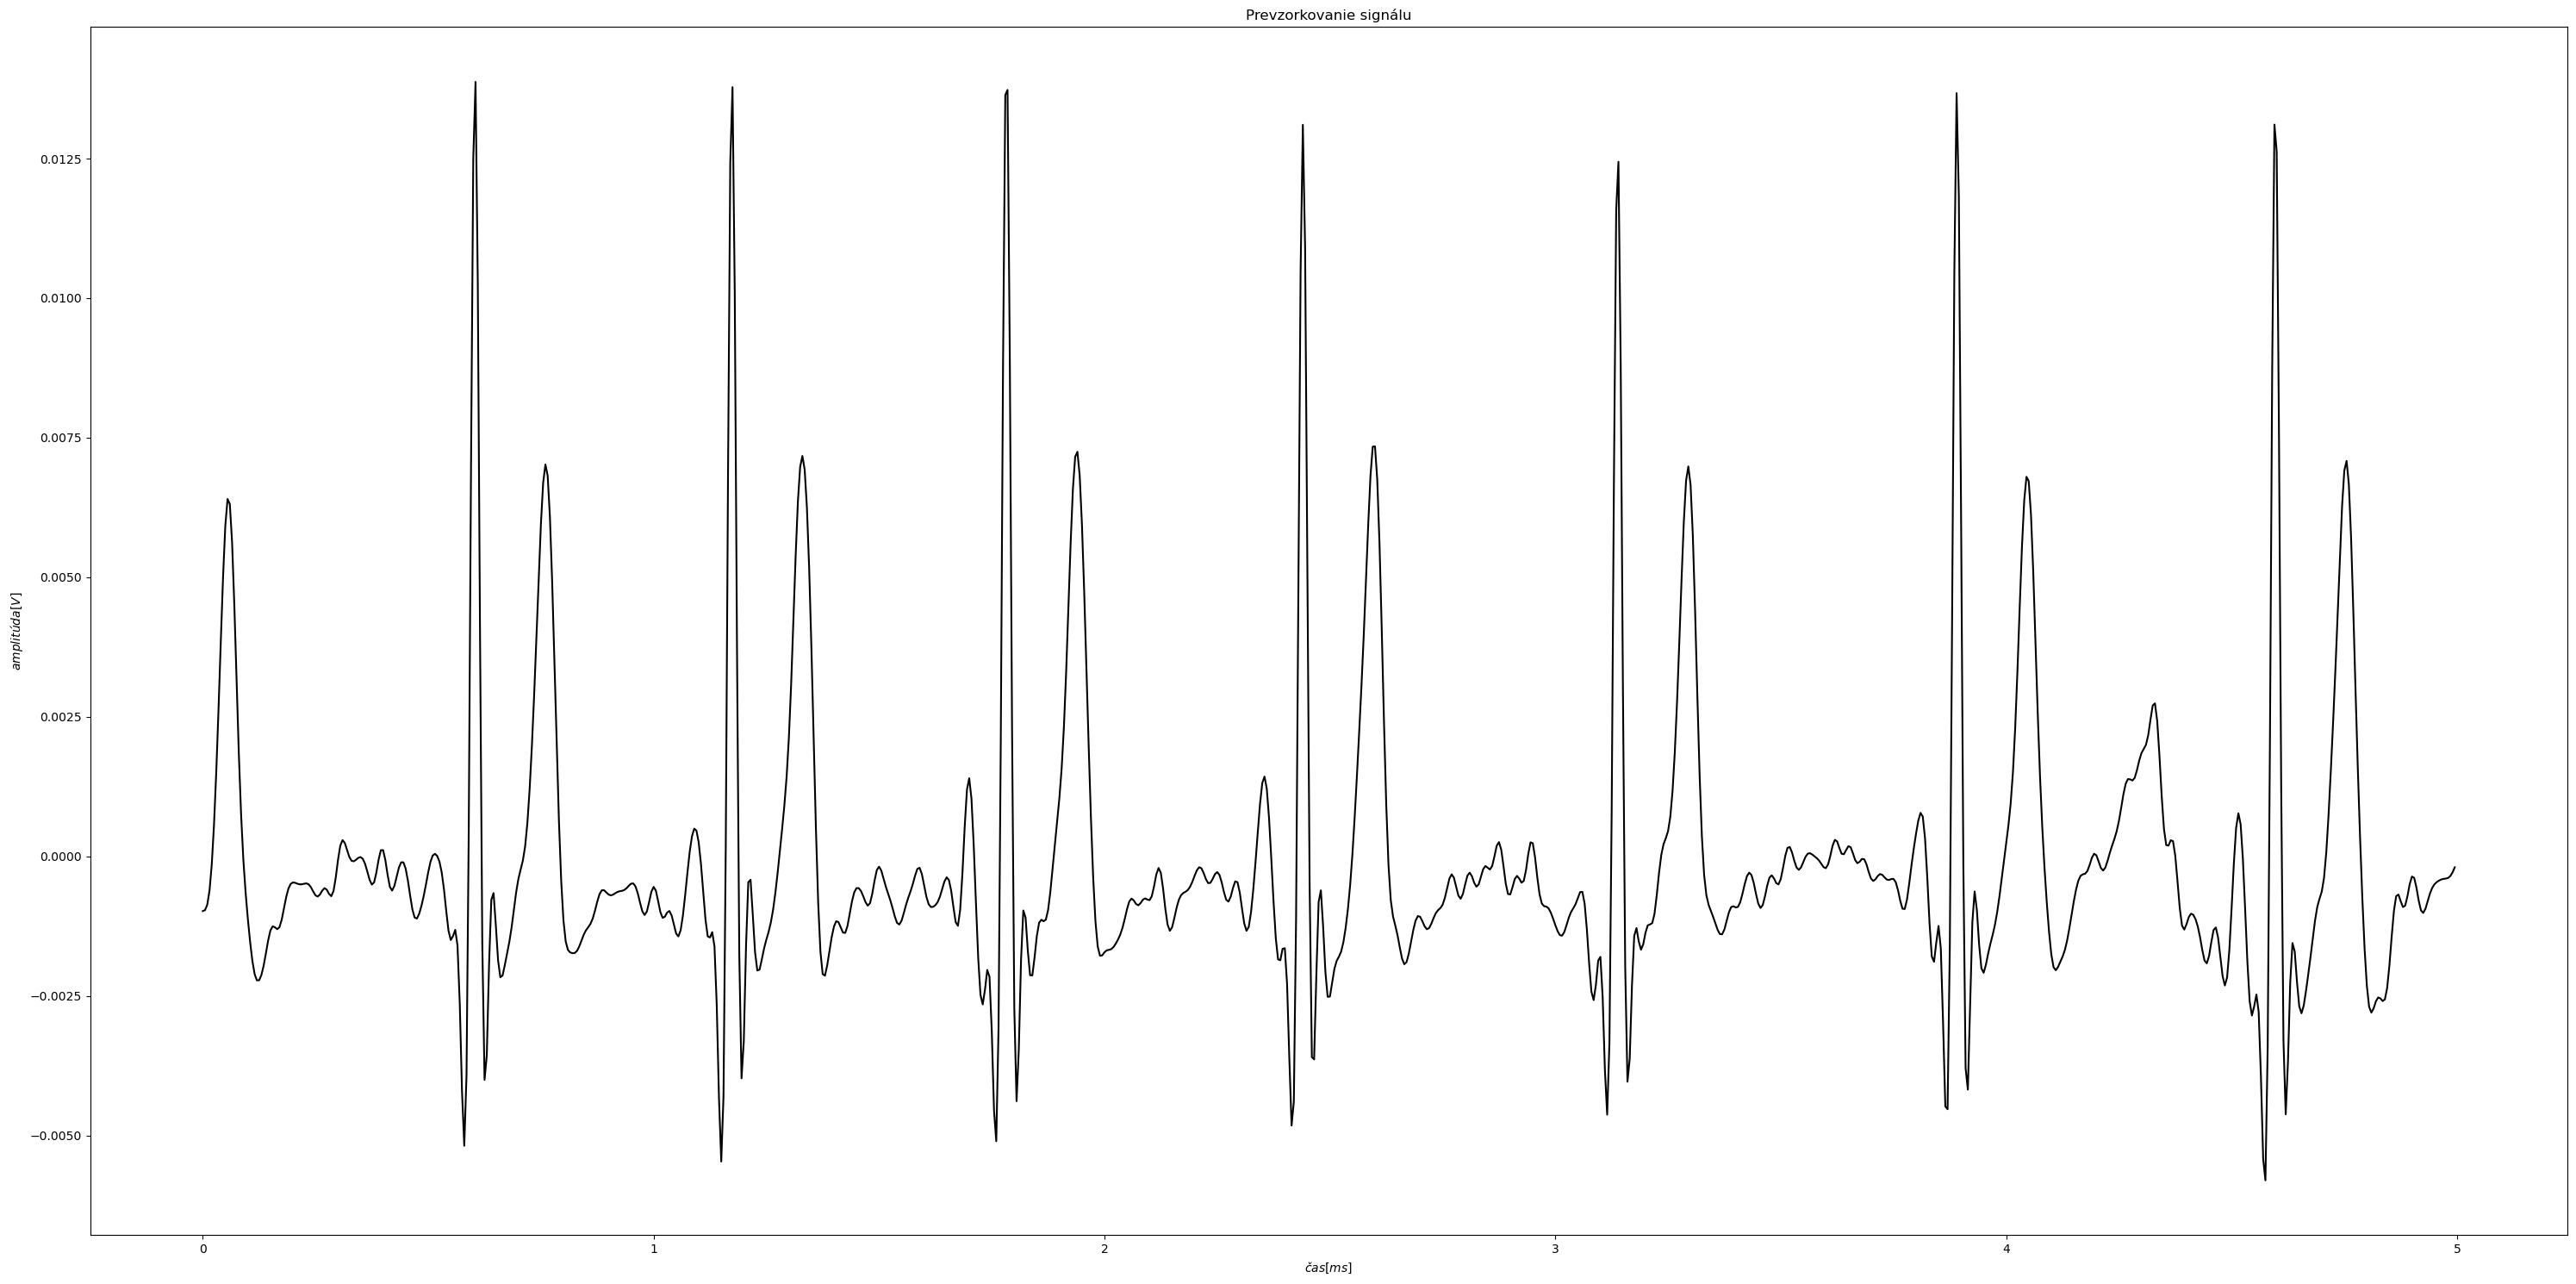

<Figure size 640x480 with 0 Axes>

In [5]:
from scipy.signal import resample, butter, filtfilt

x, fs = sf.read("xhubin04.wav")

fs_target = 100
fs_original = fs

# parametri pre anti aliasing
low_cutoff_aa = 0.15 * fs_target
order_aa = 4

# normalizacia
low_cutoff_aa /= 0.5 * fs_target

# prevzorkovanie
new_x = resample(x, int(len(x) * fs_target / fs_original))
resampled_time = np.arange(0, len(new_x)) / fs_target * 0.5

# výpočet koeficientov pre anti aliasing
b_aa, a_aa = butter(order_aa, low_cutoff_aa, btype='low', analog=False)

# anti aliasing
new_x = filtfilt(b_aa, a_aa, new_x)

plt.title('Prevzorkovanie signálu')
plt.gca().set_xlabel('$čas[ms]$')
plt.gca().set_ylabel('$amplitúda [V]$')
plt.plot(resampled_time, new_x, color='black')
plt.tight_layout()
plt.show()
# plt.savefig("png/2a.png")

sf.write("resampled.wav", new_x, fs_target)

b) [1b] Zobrazte 5 sekundový úsek původního a převzorkovaného signálu v časové doméně a zobrazte i jejich spektra.

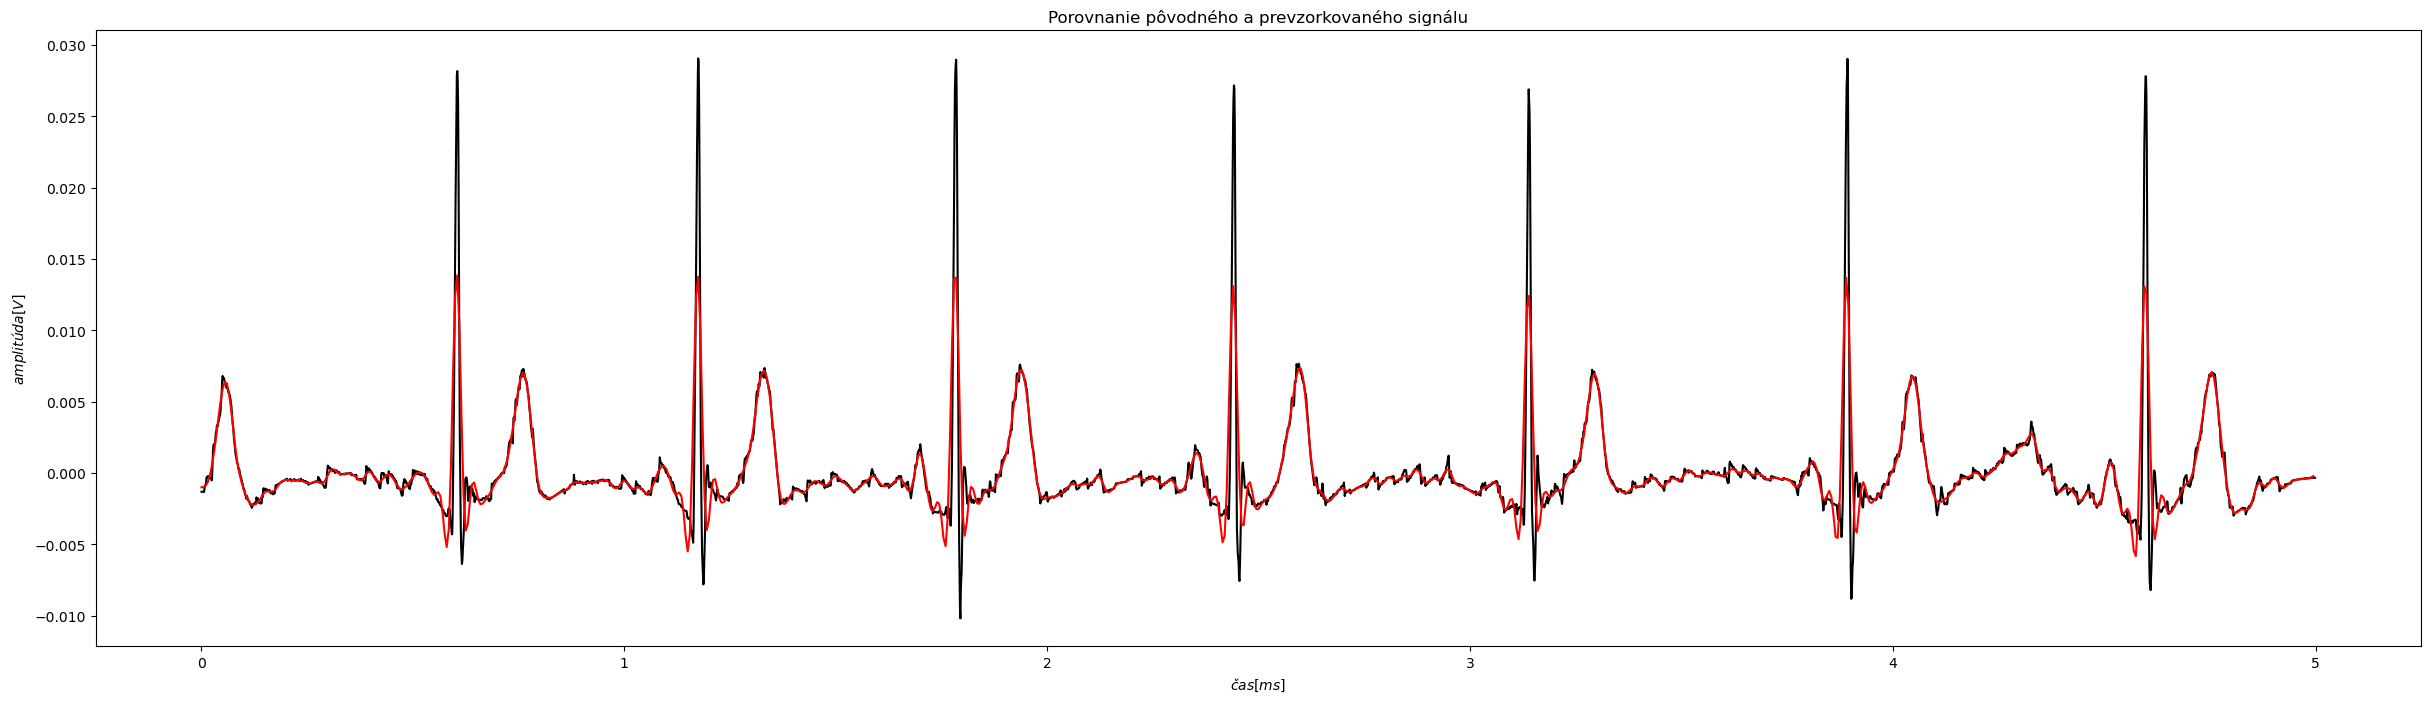

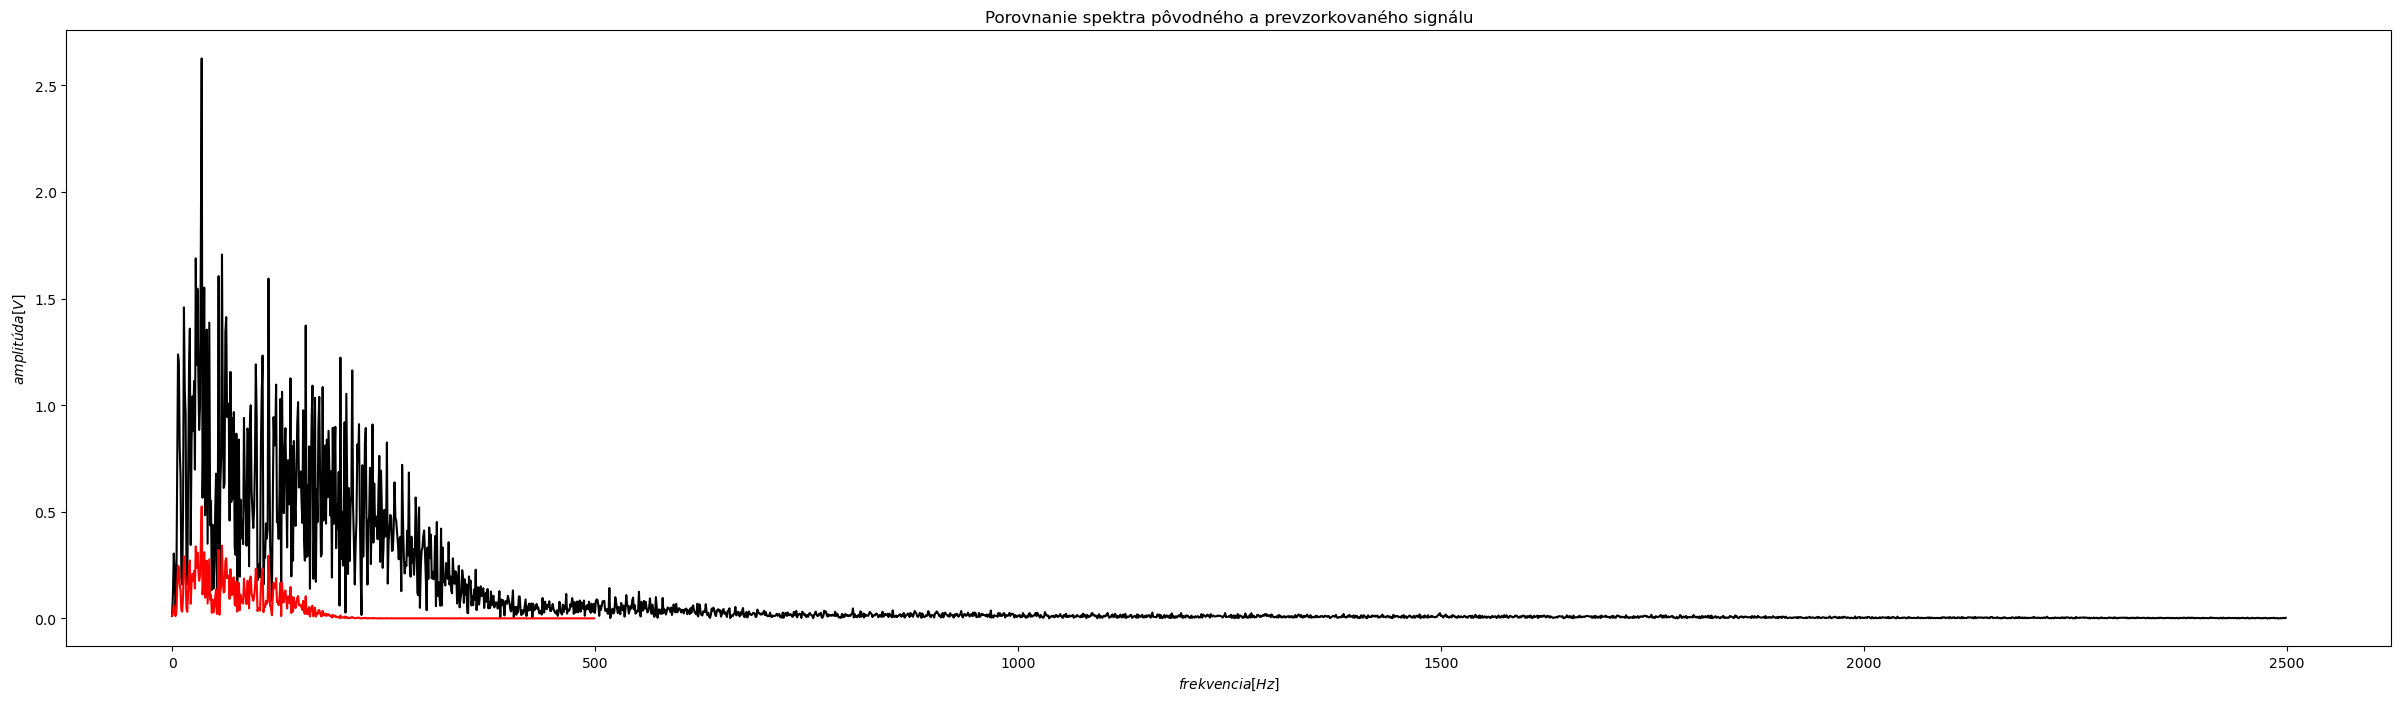

In [6]:
x, fs = sf.read("xhubin04.wav")
x_new, fs_new = sf.read("resampled.wav")

fs_target = 100
    
resampled_time = np.arange(0, len(new_x)) / fs_target * 0.5
original_time = np.arange(0, len(x)) / fs * 0.5

plt.figure(figsize=(30, 8))
plt.title('Porovnanie pôvodného a prevzorkovaného signálu')
plt.xlabel('$čas[ms]$')
plt.ylabel('$amplitúda [V]$')
plt.plot(original_time, x, color='black')
plt.plot(resampled_time, x_new, color='red')
# plt.savefig("png/2b.1.png")
plt.show()

# výpočet spektra pôvodného signálu
spectre_original = abs(np.fft.fft(x))
half_original = spectre_original[:spectre_original.size // 2]

# výpočet spektra prevzorkovaného signálu
spectre_new = abs(np.fft.fft(x_new))
half_new = spectre_new[:spectre_new.size // 2]

plt.figure(figsize=(15, 8))
plt.title('Porovnanie spektra pôvodného a prevzorkovaného signálu')
plt.ylabel('$amplitúda [V]$')
plt.xlabel('$frekvencia[Hz]$')
plt.plot(half_original, color='black')
plt.plot(half_new, color='red')
# plt.savefig("png/2b.2.png")
plt.show()

### 4.3. [4b] Vyfiltrujte nahraný signál pásmovou propustí 10Hz-20Hz

  




a) [2b] Vytvořte filtr pásmové propusti, možnosti jsou dvě: buďto filtrovat pomocí klasického návrhu filtrů, kde získáte koeficienty `a` a `b` (pomocí např. scipy.butter) a zobrazíte charakteristiku filtru + nuly a póly. Nebo se můžete vydat cestou filtrování ve frekvenční doméně, frekvenční charakteristiku vykreslete pomocí spektrální masky.

/usr/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


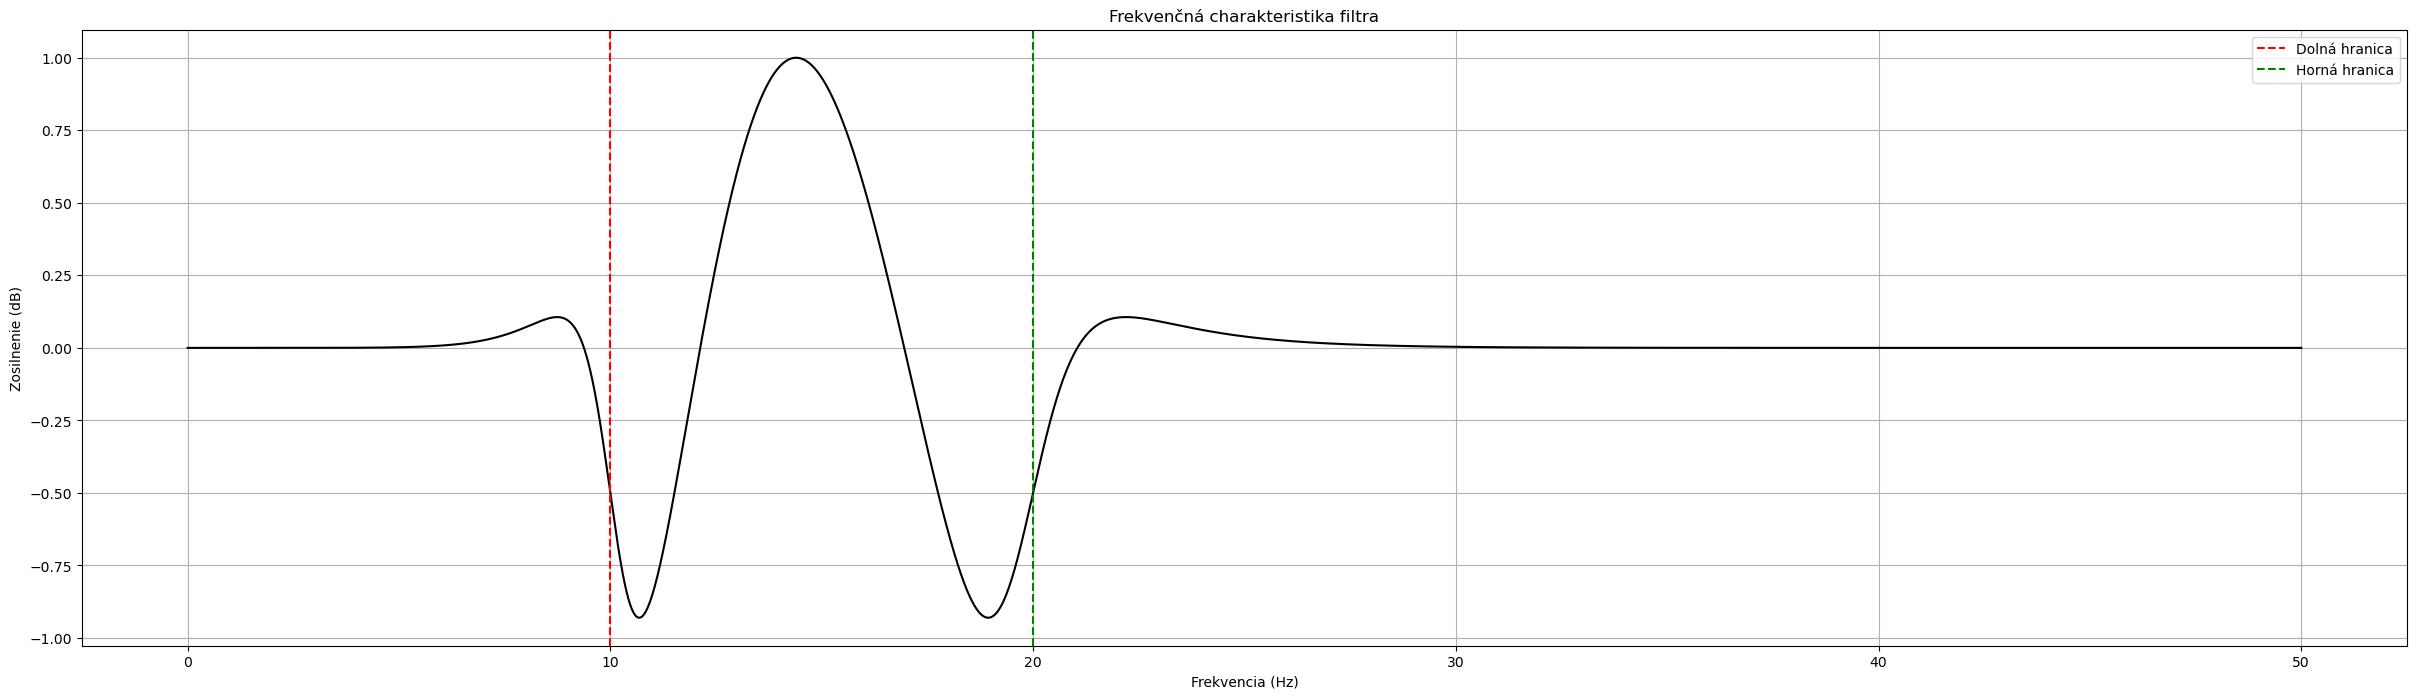

In [7]:
from scipy.signal import sosfreqz, spectrogram

x, fs = sf.read("resampled.wav")

low = 10 
high = 20 
order = 5

# filter
sos = butter(order, [low, high], btype='band', output='sos', fs=fs)

# prefiltrovanie signálu
freq, response = sosfreqz(sos, worN=160000)

plt.figure(figsize=(30, 8))
plt.plot(fs * freq / np.pi * 0.5, response, color="black")
plt.title('Frekvenčná charakteristika filtra')
plt.xlabel('Frekvencia (Hz)')
plt.ylabel('Zosilnenie (dB)')
plt.axvline(low, color='r', linestyle='--', label='Dolná hranica')
plt.axvline(high, color='g', linestyle='--', label='Horná hranica')
plt.legend()
plt.grid(True)
# plt.savefig("png/3a.1.png")
plt.show()

  b) [1b] Použijte navržený filtr na nahraný signál. Pokud máte navržený klasický filtr, proveďte filtrování z obou stran, abyste se vyhnuli fázovému posunu, to za vás zajistí například funkce scipy.signal.filtfilt. Vykreslete původní a vyfiltrovaný signál v časové doméně a spočítejte a zobrazte jejich spektra.


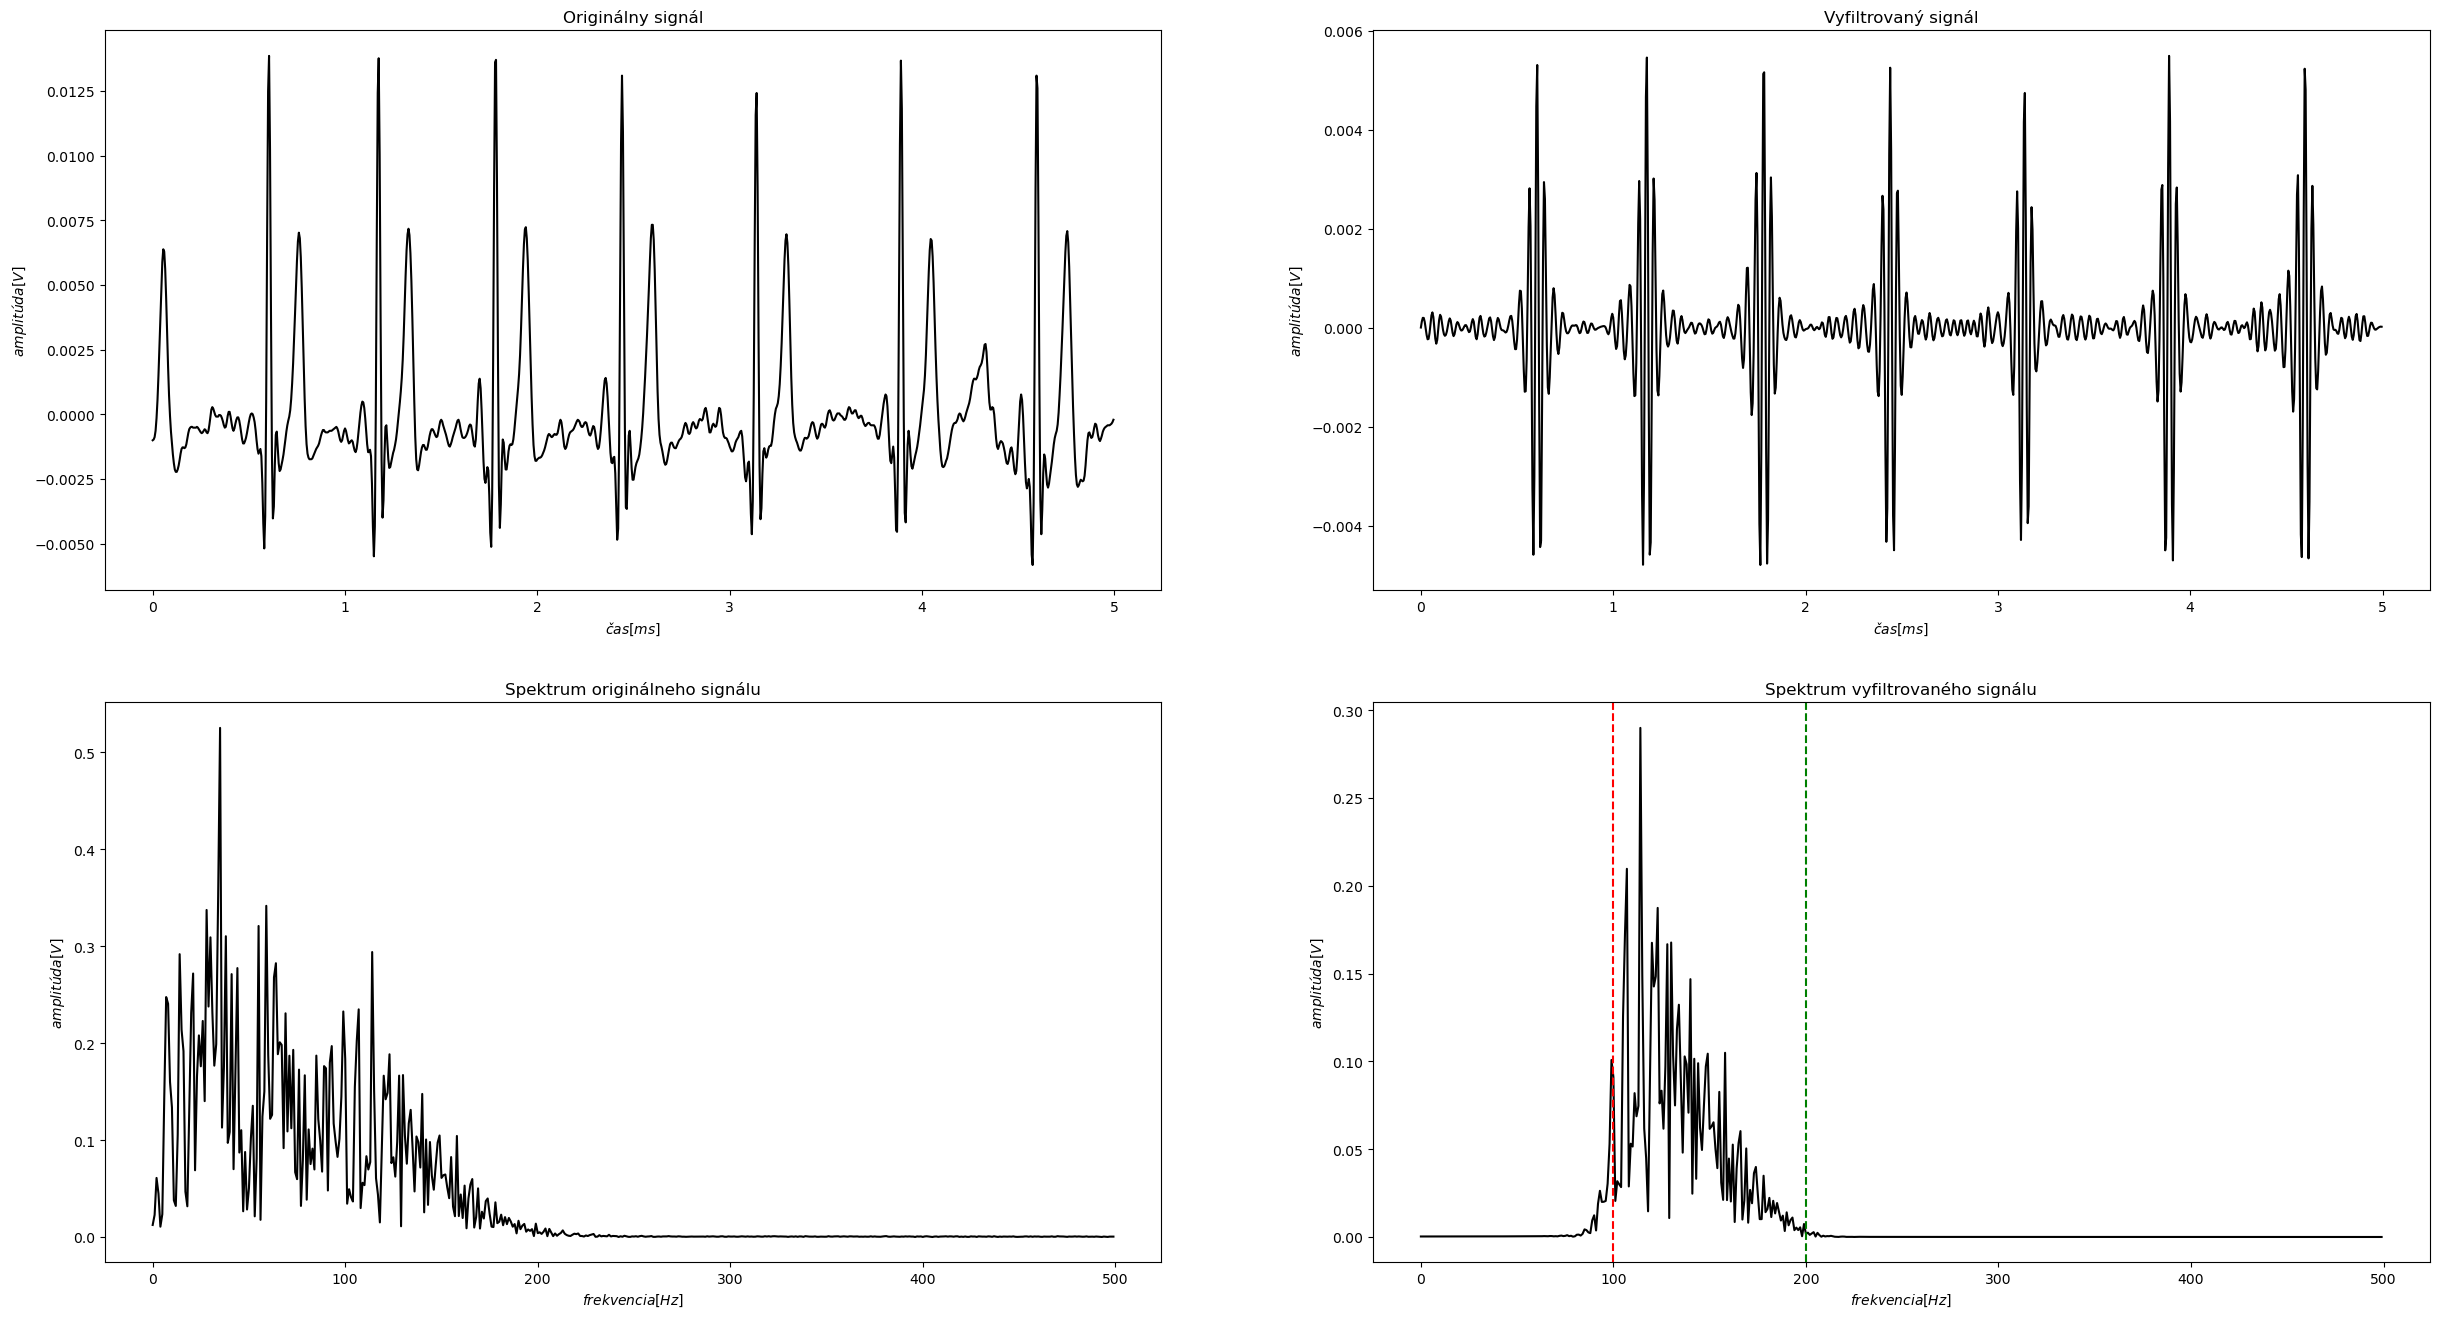

In [8]:
def filter(signal):
    global fs
    
    low = 10 
    high = 20
    order = 5
    
    b, a = butter(order, [low,high], btype="band", fs=fs)

    return filtfilt(b, a, signal) 


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 16))

x, fs = sf.read("resampled.wav")
time = np.arange(0, len(x)) / fs * 0.5

axes[0, 0].set_title('Originálny signál')
axes[0, 0].set_xlabel('$čas [ms]$')
axes[0, 0].set_ylabel('$amplitúda [V]$')
axes[0, 0].plot(time, x, color='black')

new_x = filter(x)
new_time = np.arange(0, len(new_x)) / fs * 0.5

axes[0, 1].set_title('Vyfiltrovaný signál')
axes[0, 1].set_xlabel('$čas [ms]$')
axes[0, 1].set_ylabel('$amplitúda [V]$')
axes[0, 1].plot(new_time, new_x, color='black')

spectrum_original = abs(np.fft.fft(x))
spectrum_filtered = abs(np.fft.fft(filter(x)))

axes[0 + 1, 0].set_title('Spektrum originálneho signálu')
axes[0 + 1, 0].set_ylabel('$amplitúda [V]$')
axes[0 + 1, 0].set_xlabel('$frekvencia [Hz]$')
axes[0 + 1, 0].plot(spectrum_original[:spectrum_original.size//2], color='black',  linestyle='-')

axes[0 + 1, 1].set_title('Spektrum vyfiltrovaného signálu') 
axes[0 + 1, 1].set_ylabel('$amplitúda [V]$')
axes[0 + 1, 1].set_xlabel('$frekvencia [Hz]$')
axes[0 + 1, 1].plot(spectrum_filtered[:spectrum_filtered.size//2] , color='black', linestyle='-')
axes[0 + 1, 1].axvline(low * 10, color='r', linestyle='--', label='Dolná hranica')
axes[0 + 1, 1].axvline(high * 10, color='g', linestyle='--', label='Horná hranica')

new_fs = fs * 0.5
sf.write("filtered.wav", new_x, fs)

plt.show()

  c) [1b] Okomentujte rozdíl mezi filtrovaným a nefiltrovaným signálem a jejich spektry. Pokud bychom použili filtrování pouze z jedné strany (obyčejnou konvoluci), jaké je teoreticky největší posunutí ve vzorcích, které se může objevit a proč?



   a) [1b] Detekujte QRS v převzorkovaném vyfiltrovaném signálu pomocí tresholdu (prahu). Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu, spočítat si maximální amplitudu a jako treshold vzít vámi určené procento této hodnoty. **Dávejte pozor na možnost otočeného QRS v signálu.** Do vykresleného signálu s detekcemi vykreslete i čáru udávající použitý treshold.

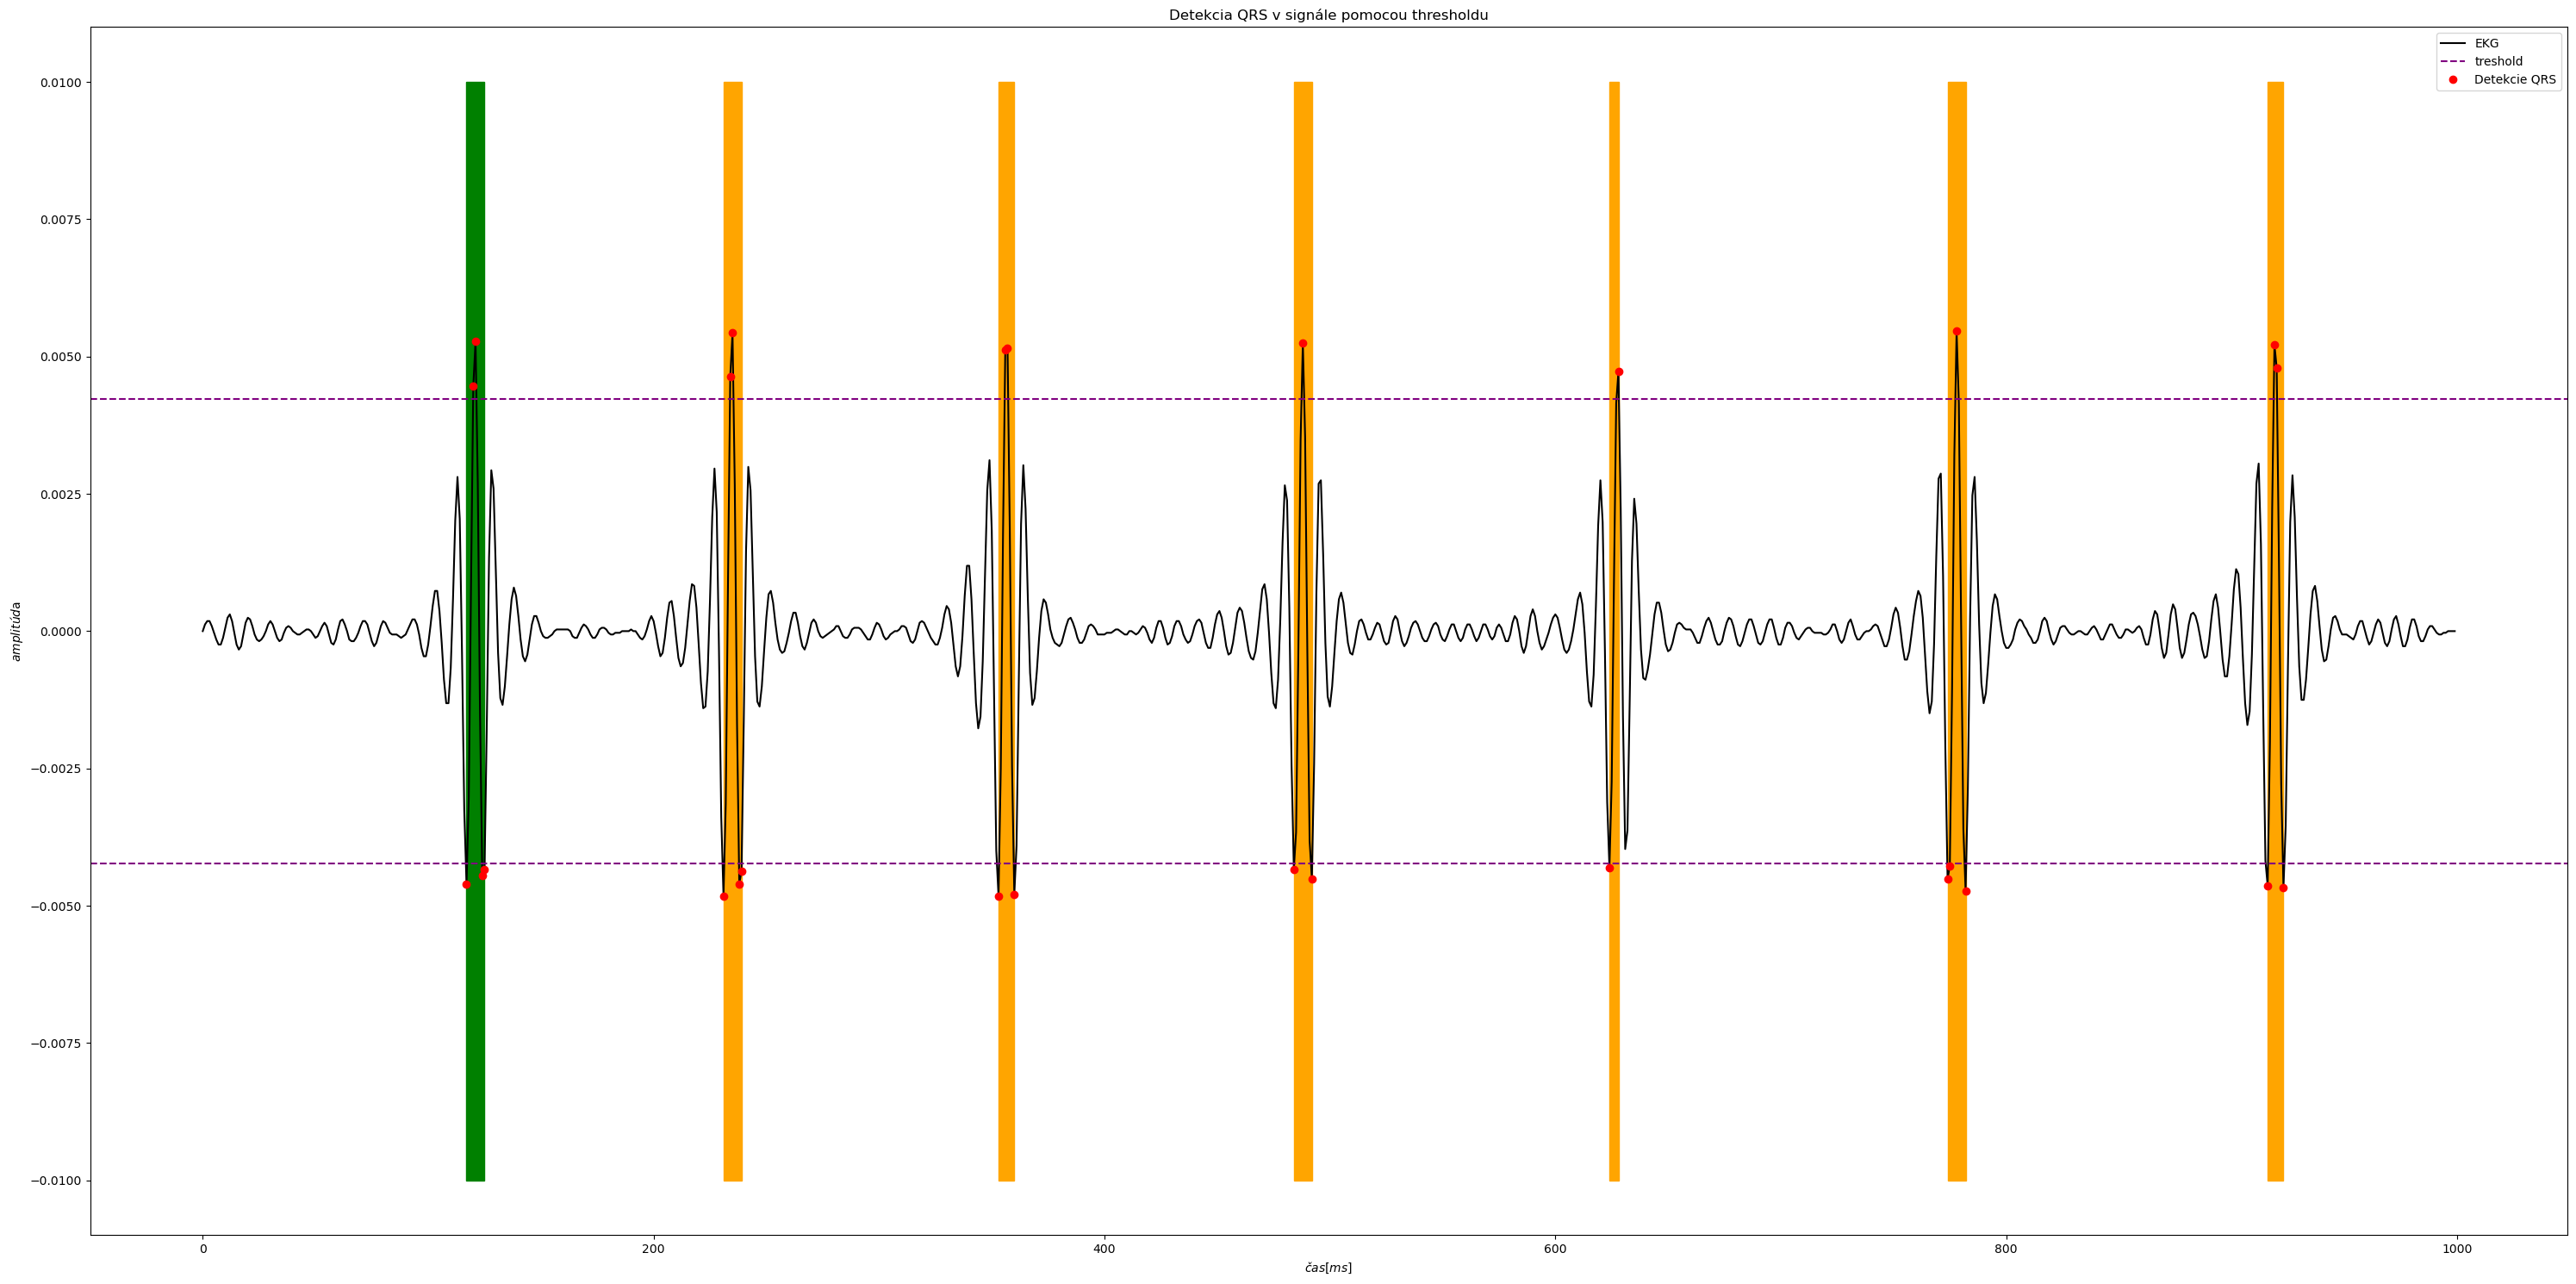

In [11]:
from matplotlib.patches import Rectangle

x, fs = sf.read("filtered.wav")

QRS = []
values = []

for j in range(0, 150):
    values.append(x[j])

# urcenie tresholdu
values.sort()
threshold = max(values) * 0.8

for j in range(len(x)):
    if (abs(x[j]) > threshold):
        QRS.append([j, x[j]])

plt.figure(figsize=(30, 15))
plt.title('Detekcia QRS v signále pomocou thresholdu')
plt.gca().set_xlabel('$čas[ms]$')
plt.gca().set_ylabel('$amplitúd$a')
plt.plot(x, color='black', label="EKG")

plt.axhline(y = threshold, color='purple', linestyle='--', label="treshold")
plt.axhline(y = -threshold, color='purple', linestyle='--')

plt.plot(QRS[0][0], QRS[0][1], "o", color='red', label="Detekcie QRS")
for j in range(1, len(QRS)):
    plt.plot(QRS[j][0], QRS[j][1], "o", color='red')

k = 0
first = True
for j in range(1, len(QRS)):
    if (abs(QRS[j - 1][0] - QRS[j][0])) > 20:
        if first:
            plt.gca().add_patch(Rectangle((QRS[j - 1][0],  -0.01), QRS[k][0]-QRS[j - 1][0], 0.02, color='green'))
            first = False
        else:
            plt.gca().add_patch(Rectangle((QRS[j - 1][0],  -0.01), QRS[k][0]-QRS[j - 1][0], 0.02, color='orange'))
        k = j
        
plt.gca().add_patch(Rectangle((QRS[j][0], -0.01), QRS[k][0]-QRS[j][0], 0.02, color='orange'))
plt.legend()

plt.tight_layout()
plt.show()

b) [2b] Detekujte QRS v signálu pomocí autokorelace v převzorkovaném nefiltrovaném signálu. Pro tuto detekci musíte nejdříve získat vzorek jednoho QRS ze signálu. Dále budete autokorelovat signál právě s tímto výstřižkem. QRS se budou nacházet na místech, kde vám budou vycházet vysoké hodnoty korelace. Do vykresleného signálu s detekcemi zaznačte i vámi zvolený výstřižek.

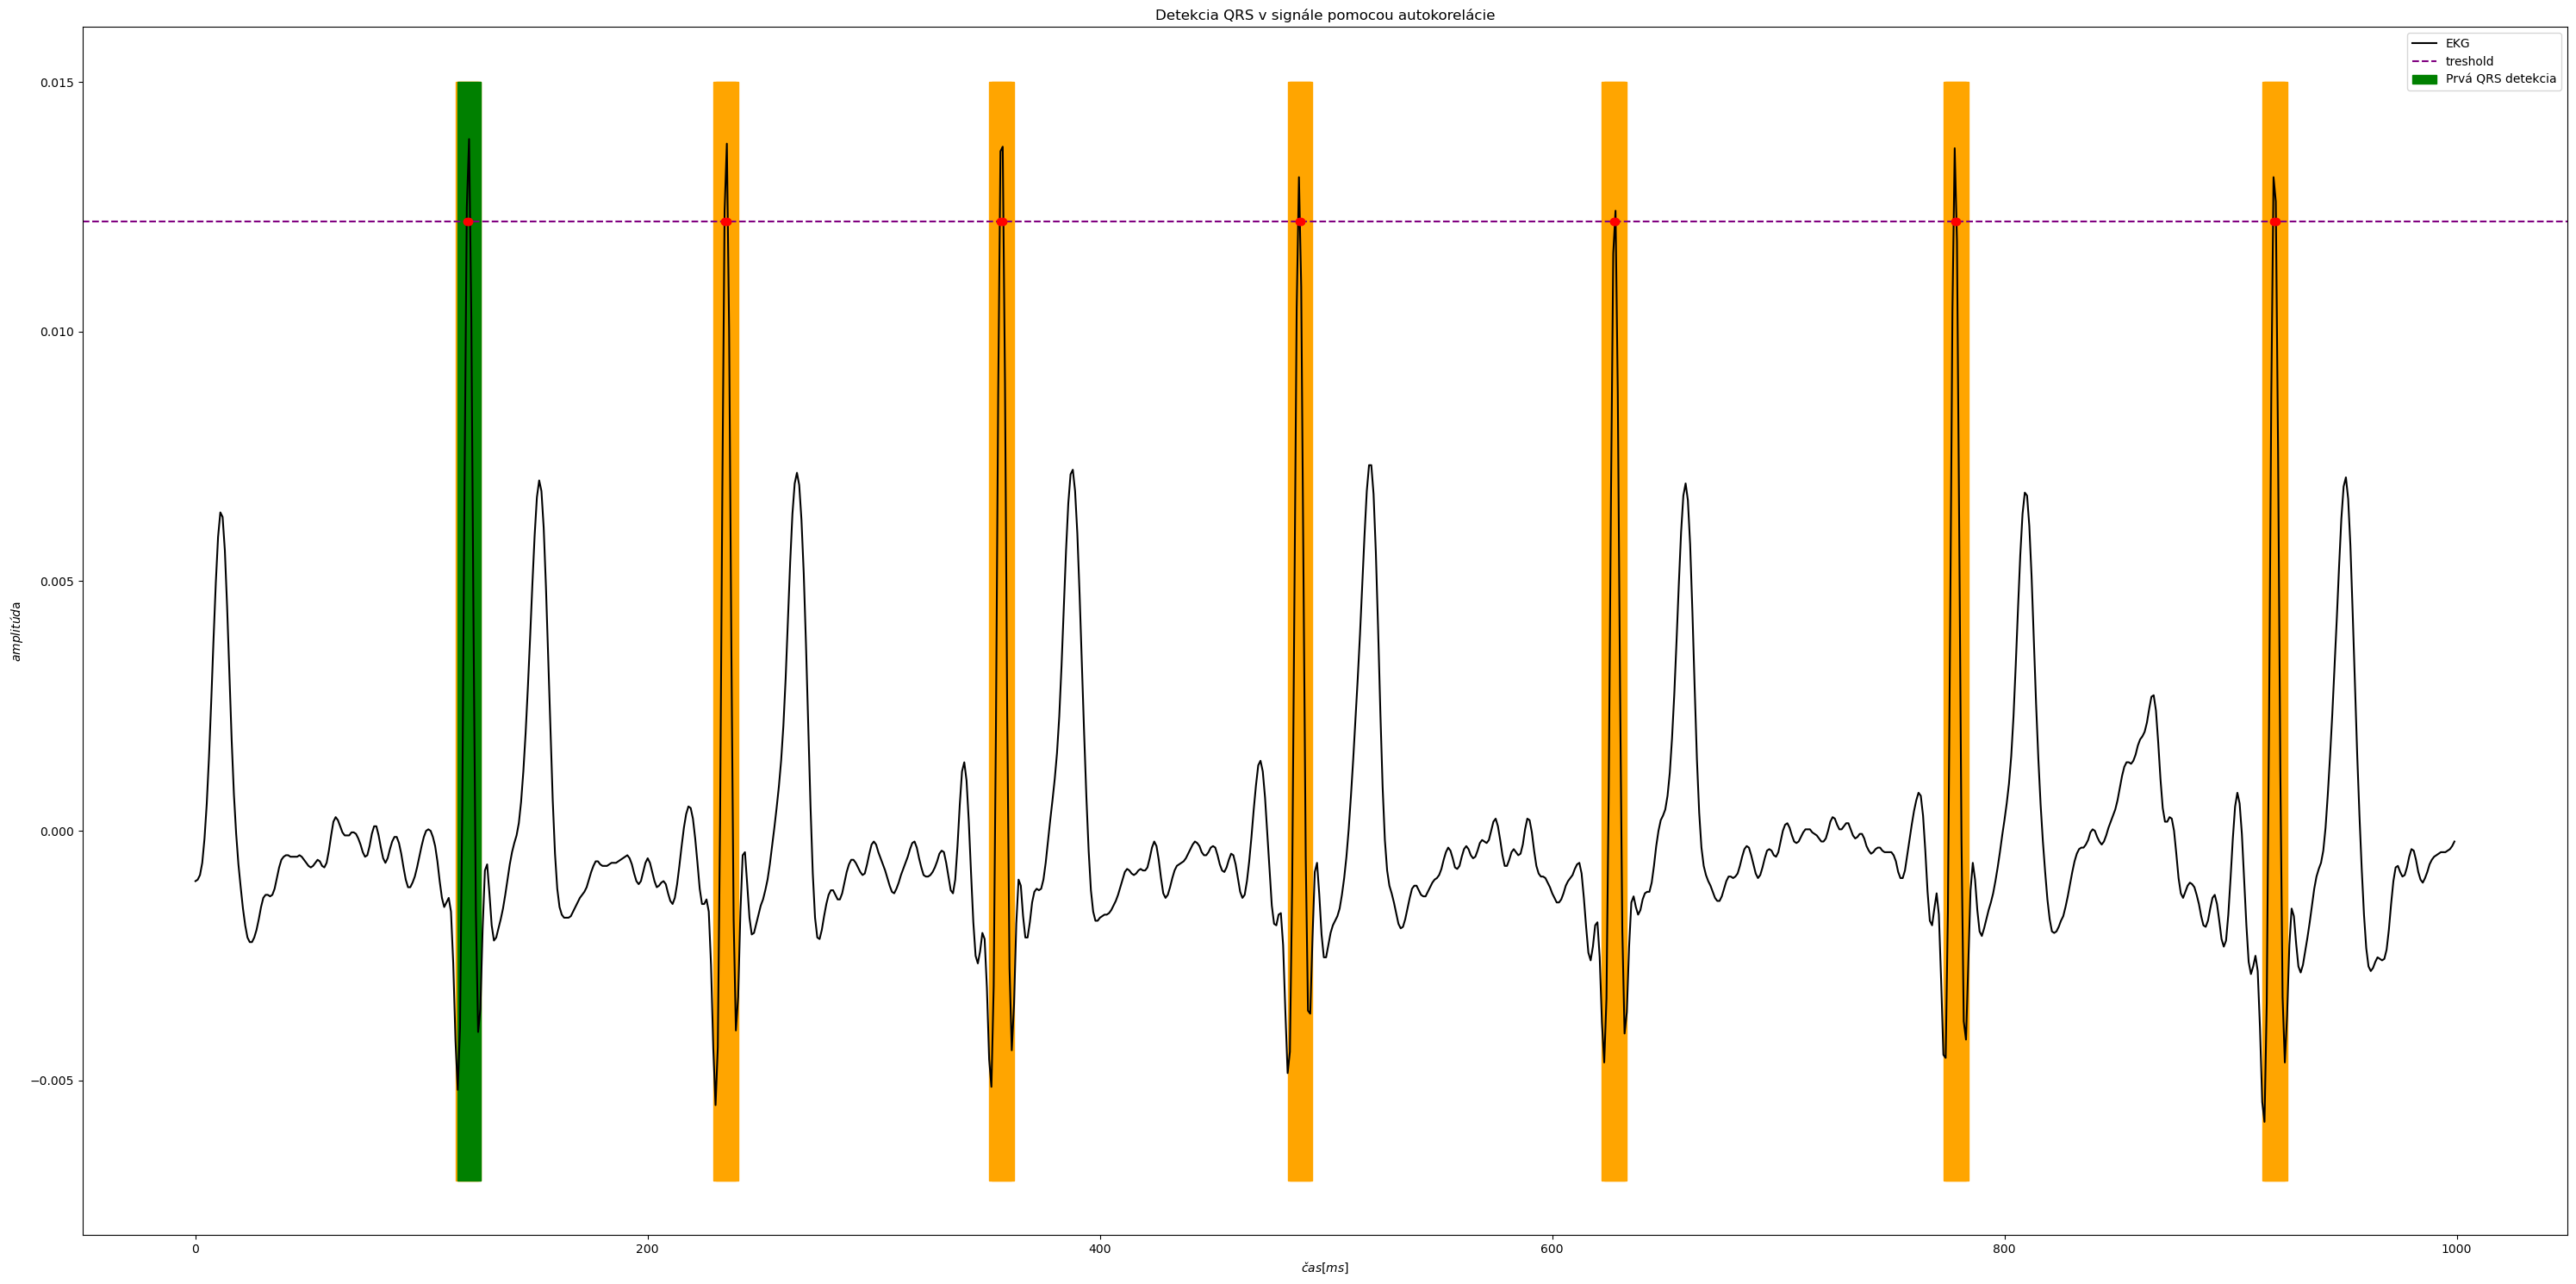

In [12]:
import scipy.signal as ss
from scipy.signal import butter, filtfilt, fftconvolve

x, fs = sf.read("resampled.wav")
time = np.arange(0, len(x))

QRS = []
values = []

for j in range(0, 150):
    values.append(x[j])

# urcenie tresholdu
values.sort()
threshold = (values[-1] + values[-2] + values[-3]) / 3

for j in range(len(x)):
    if x[j] == values[-1]:
        x_qrs = j
        y_qrs = values[-1]

# hladanie QRS pomocou autokorelácie
arr = []
for j in range(0, len(x)):
    auto = ss.correlate(x[j], y_qrs, "full")
    arr.append([j, auto])

plt.figure(figsize=(30, 15))
plt.title('Detekcia QRS v signále pomocou autokorelácie')
plt.gca().set_xlabel('$čas[ms]$')
plt.gca().set_ylabel('$amplitúd$a')
plt.plot(x, color='black', label="EKG")

plt.axhline(y = threshold, color='purple', linestyle='--', label="treshold")

for j in range(1, len(arr)):
    if (arr[j][1] >= 0.00015):         
        plt.plot(arr[j][0], threshold, "o", color='red')
        plt.gca().add_patch(Rectangle((arr[j][0] - 5,  -0.007), 10, 0.022, color='orange'))

plt.gca().add_patch(Rectangle((x_qrs - 5,  -0.007), 10, 0.022, color='green', label="Prvá QRS detekcia"))
plt.legend()

plt.tight_layout()
plt.show()

### 4.5. [3.5b] Vytvořte detektor QRS v frekvenční doméně a detekované QRS zakreslete jako v předchozí úloze 4.4

a) [2b] Detekujte QRS pomocí použití spektrogramu. Spočítejte a zobrazte spektrogram nahraného převzorkovaného filtrovaného signálu. Použijte parametry, `hop_size=120ms`a `window_len=200ms`, popřípadě si zkuste s těmito parametry pohrát. Spektrogram dále normalizujte v čase. Spočítejte sumy energie spektra pro jednotlivé časové biny. Dále vytvořte práh podle hodnoty energie spektra u prvního vámi zvoleného QRS komplexu. Tento práh použijte pro detekci zbylých QRS komplexů v signálu.

b) [1b] Detekujte QRS pomocí použití obálek a Hilbertovy transformace.

Hilbertova transformace je spočítaná podle následujícího vzorce

$x_a = F^{-1}(F(x) 2U) = x + i y,$

kde F je Fourierova transformace a $F^{-1}$ je její zpětná varianta. $U$ je Heavisideova funkce neboli funkce jednotkového skoku, která je definována: $U(x):$

\begin{cases}
      0.5 & x=0 \\
      1 & 0<x<\frac{N}{2} \text{ pro  $N$  liché} \\
      0.5 & x=\frac{N}{2} \text{ pro  $N$  liché} \\
      1 & 0<x\le\frac{N}{2} \text{ pro  $N$  sudé} \\
      0 & jinak
\end{cases}

kde $N$ je počet koeficientů Fourierovy transformace - pokud není určeno jinak, je to počet vzorků signálu.

Jinými slovy obálku spočítate tak, že:

* Spočítáte FFT $F$ na filtrovaném a převzorkovaném signálu
* Vynulujete pravou symetrickou část spektra
* Levou část spektra vynasobíte 2 kromě prvního a prostředního binu (při sudém počtu frekvenčních binů).
* Provedete zpětnou FFT $F^{-1}$

Abyste získali obálku signálu, je třeba vzít absolutní hodnotu signálu získaného Hilbertovou transformací.

Obálku a signál vykreslete do jednoho grafu přes sebe, obálka by měla obalovat daný signál.

In [ ]:
# Zde napište váš kód

c) [0.5b] Při kterých metodách detekcí QRS nám vadí otočený (flipnutý) signál, při kterých ne a proč?

*Zde napište vaše řešení.*

### 4.6 [2b] Detekce R-R intervalu

In [ ]:
# Zde napište váš kód

### 4.7 Bonus

a) Načtěte si signál obsahující fibrilaci FIS.wav. Proveďte na něm filtrace a převzorkování. Poté zkuste použít nějaký QRS detektor. Z detekovaných QRS detekujte R-R intervaly. Porovnejte R-R intervaly pro fibrilaci a klasický signál bez patologie (sinusovy rytmus). Měli byste vidět prudké změny v R-R intervalech a jejich nepravidelnost. Zároveň se vám může stát, že vám některé metody detekce QRS nepodají tak kvalitní výkon jako při sinusovém rytmu.

In [ ]:
# Zde napište váš kód

b) Načtěte si signál obsahující komorovou extrasystolu KES.wav. Proveďte na něm filtrace a převzorkování. Spočítejte a zobrazte spektrogram úseku tohoto signálu. Porovnejte spektrogramy vašeho signálu a signálu KES.wav. Měli byste vidět rozšířenou aktivitu na nízkých frekvencích. Dále zobrazte a porovnejte tyto signály v časové doméně. Obsažené komorové extrasystoly by se měly projevit jako zvláštní široké QRS.

In [ ]:
# Zde napište váš kód